# Sentiment Classification

A Machine Learning project has a series of well known steps:
    - Define the problem
    - Load data
    - Evaluate Algorithms
    - Make Predictions

## 1. Defining the problem

Given a labeled dataset with sentiment labels (*positive and negative*), the task is to learn a classifier which can be used to predict the labels of new unseen data.

### Setting up the Python libraries

In [11]:
import csv
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

#stopwords = nltk.corpus.stopwords.words('english')

## 2. Loading Data

___[sample_excath_labelled.csv](https://github.com/Pikakshi/Advanced_NLP_with_ML/blob/master/Datasets/sample_excath_labelled.csv) is a sample of a dataset that is currently being used for conducting Text Analytics in the [VISTA-AR project](https://www.vista-ar.eu/en/). This dataset is a sample of a collection of tourist reviews that have been collected from TripAdvisor for analysis of tourist experience at Exeter Cathedral.___

- It contains two columns. First column is the review content and second column is the assigned sentiment (positive = 1 or negative = 0) which are assigned to *data* and *target* lists respectively.

In [8]:
def load_file():
    with open('C:/Users/pm447/Downloads/VISTA-AR/Workshops/Workshop 2/Datasets/sample_excath_labelled.csv','r') as csv_file:
        reader = csv.reader(csv_file,delimiter=",",quotechar='"')
       # reader.next()
        data =[]
        target = []
        for row in reader:
            # skip missing data
            if row[0] and row[1]:
                data.append(row[0])
                target.append(row[1])

        return data,target

### Feature Engineering using Word Count Vectors

- TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.
- It also takes into account the fact that some documents may be larger than others by normalizing the TF term (expressing instead relative term frequencies).
- For details on how to generate Tf-Idf Vectors or Count Vectors, refer to this [notebook](https://github.com/Pikakshi/NLP_Introduction/blob/master/advancedProcessing.ipynb).

In [9]:
# preprocess creates the term frequency matrix for the review data set
def preprocess():
    data,target = load_file()
    count_vectorizer = CountVectorizer(binary='true')
    data = count_vectorizer.fit_transform(data)
    tfidf_data = TfidfTransformer(use_idf=False,).fit_transform(data) #transforms the count matrix to a normalized tf representation
    
    return tfidf_data

### Model Building

In [14]:
def learn_model(data,target):
    # preparing data for split validation. 60% training, 40% test
    data_train,data_test,target_train,target_test = train_test_split(data,target,test_size=0.4,random_state=43)
    #classifier = BernoulliNB().fit(data_train,target_train)  #training on available data
    classifier = DecisionTreeClassifier(max_depth = 2, random_state = 0).fit(data_train,target_train)
    #classifier = LogisticRegression().fit(data_train,target_train)
    predicted = classifier.predict(data_test)
    evaluate_model(target_test,predicted)  

## 3. Evaluate Model and Generate Test Results

In [6]:
import matplotlib.pyplot as plt
def evaluate_model(target_true,target_predicted):
    print (classification_report(target_true,target_predicted))  #evaluate model 
    print ("The accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)))
    confusion_matrix_result = metrics.confusion_matrix(target_true,target_predicted)
    
    classes = ["Negatives", "Positives"]

    plt.figure()
    plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title("Confusion Matrix - Sentiment Analysis")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix_result[i][j]))
    plt.show()
    
    true_negatives = confusion_matrix_result[0][0]
    false_negatives = confusion_matrix_result[1][0]
    false_positives = confusion_matrix_result[0][1]
    true_positives = confusion_matrix_result[1][1]

    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2*(recall * precision) / (recall + precision)

    print('Precision:',precision)
    print('Recall:',recall)
    print('F1 Score:',f1_score)

              precision    recall  f1-score   support

           0       0.86      0.33      0.48        18
           1       0.66      0.96      0.78        24

    accuracy                           0.69        42
   macro avg       0.76      0.65      0.63        42
weighted avg       0.74      0.69      0.65        42

The accuracy score is 69.05%


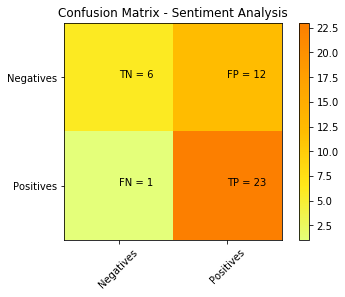

Precision: 0.6571428571428571
Recall: 0.9583333333333334
F1 Score: 0.7796610169491525


In [15]:
def main():
    data,target = load_file()
    tf_idf = preprocess()
    learn_model(tf_idf,target)

main()